In [1]:
from planning.Safe_Planner import Safe_Planner
import numpy as np
from planning.utils import filter_reachable
import matplotlib.pyplot as plt
import pickle

In [2]:
sp = Safe_Planner(r=10, n_samples = 1000, speed = 1, goal_f = [7,-2,0.5,0], world_box=np.array([[0,0],[8,8]]))
sp.sample_pset()

In [3]:
def test_node(node_idx):
    node = sp.Pset[node_idx]
    fset, fdist, ftime, ftraj, costs = filter_reachable(node,sp.Pset,sp.r,sp.vx_range,sp.vy_range, 'F', sp.dt)
    print("Forward Set:")
    print(fset)
    print("Forward Distance:")
    print(fdist)
    print("Forward Time:")
    print(ftime)
    print("Forward Trajectory:")
    print(ftraj)
    return costs

In [5]:
cost = test_node(100)
filtered = [c for c in cost if c < 10]
print(filtered)
print(len(filtered))

rip 79
Forward Set:
[40, 41, 108, 184]
Forward Distance:
[5.63645784195643, 4.9691431256490635, 3.0890719060452136, 6.958153153262115]
Forward Time:
[1.6069134472120596, 1.730844066924151, 0.6960359397910852, 2.3005694348628745]
Forward Trajectory:
[(array([[ 0.99587911,  3.74149895, -0.4913066 ,  0.97320008],
       [ 0.95092082,  3.8315412 , -0.41164795,  0.83585924],
       [ 0.91288058,  3.91007041, -0.35212373,  0.74068072],
       [ 0.87998043,  3.98063624, -0.30810324,  0.67456943],
       [ 0.85085498,  4.04564299, -0.27622608,  0.62867786],
       [ 0.82441692,  4.10682882, -0.25410527,  0.59736853],
       [ 0.79976808,  4.16547276, -0.24000949,  0.57662421],
       [ 0.77617983,  4.22242462, -0.2328148 ,  0.56377043],
       [ 0.75299796,  4.27840423, -0.23190074,  0.5575487 ],
       [ 0.72959962,  4.33414798, -0.23704608,  0.55797278],
       [ 0.70537869,  4.39025775, -0.248399  ,  0.56542759],
       [ 0.67969509,  4.44746749, -0.2664745 ,  0.58151209],
       [ 0.651832

In [8]:
sp.reachable

[(0, ([], [], [], []), ([], [], [], [])),
 (1, ([], [], [], []), ([], [], [], [])),
 (2, ([], [], [], []), ([], [], [], [])),
 (3, ([], [], [], []), ([], [], [], [])),
 (4, ([], [], [], []), ([], [], [], [])),
 (5, ([], [], [], []), ([], [], [], [])),
 (6, ([], [], [], []), ([], [], [], [])),
 (7, ([], [], [], []), ([], [], [], [])),
 (8, ([], [], [], []), ([], [], [], [])),
 (9, ([], [], [], []), ([], [], [], [])),
 (10, ([], [], [], []), ([], [], [], [])),
 (11, ([], [], [], []), ([], [], [], [])),
 (12, ([], [], [], []), ([], [], [], [])),
 (13, ([], [], [], []), ([], [], [], [])),
 (14, ([], [], [], []), ([], [], [], [])),
 (15, ([], [], [], []), ([], [], [], [])),
 (16, ([], [], [], []), ([], [], [], [])),
 (17, ([], [], [], []), ([], [], [], [])),
 (18, ([], [], [], []), ([], [], [], [])),
 (19, ([], [], [], []), ([], [], [], [])),
 (20, ([], [], [], []), ([], [], [], [])),
 (21, ([], [], [], []), ([], [], [], [])),
 (22, ([], [], [], []), ([], [], [], [])),
 (23, ([], [], [], []

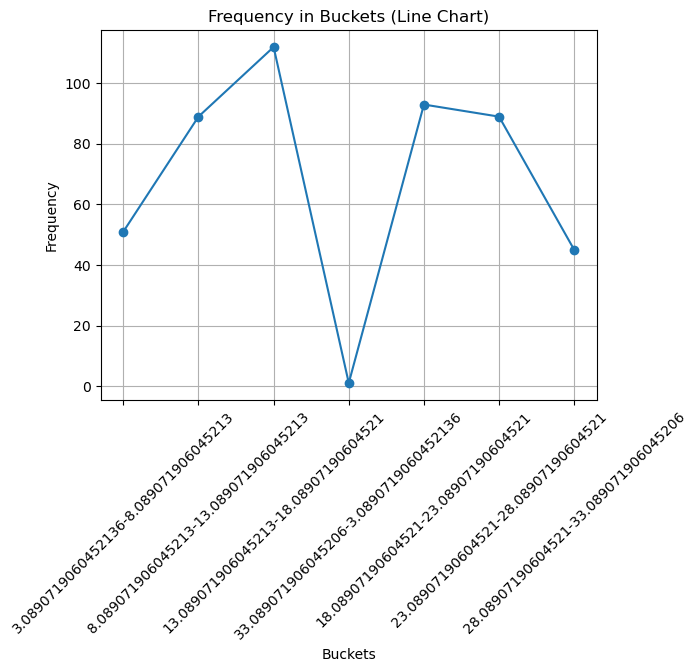

In [42]:
from collections import Counter
import numpy as np

def plot_buckets_line_chart(arr, bucket_size):
    # Define buckets based on the range of the array
    min_val, max_val = min(arr), max(arr)
    bins = np.arange(min_val, max_val + bucket_size, bucket_size)
    
    # Categorize elements into buckets
    bucketed_data = np.digitize(arr, bins, right=True)
    
    # Count the frequency in each bucket
    freq = Counter(bucketed_data)
    
    # Prepare data for the line chart
    bucket_labels = [f'{bins[i-1]}-{bins[i]}' for i in freq.keys()]
    frequencies = list(freq.values())
    
    # Plot the frequency using a line chart
    plt.plot(bucket_labels, frequencies, marker='o')
    plt.xlabel('Buckets')
    plt.ylabel('Frequency')
    plt.title('Frequency in Buckets (Line Chart)')
    plt.xticks(rotation=45)  # Rotate bucket labels for better readability
    plt.grid(True)
    plt.show()

plot_buckets_line_chart(cost, bucket_size=5)

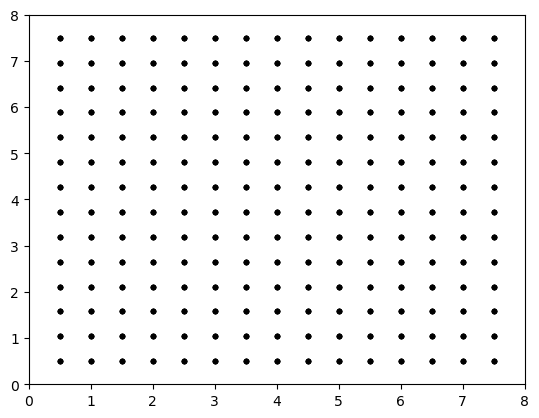

In [44]:
# plots
def plot_reachable(self, direction):
    '''Plot reachability connections'''
    _, ax = plt.subplots()
    ax.set_xlim([0,self.world.w])
    ax.set_ylim([0,self.world.h])
    for i in range(self.n_samples):
        ax.scatter(self.Pset[i][0],self.Pset[i][1],color = 'k',marker = '.')
        if direction == 'F':
            fset = self.reachable[i][1]
            if len(fset[0]) > 0:
                print(fset)
            for j in range(len(fset[0])):
                # show_trajectory(ax, self.Pset[i],
                #                 self.Pset[fset[0][j]],fset[1][j],self.dt)
                traj = self.reachable[i][1][3][j][0]
                print(traj)
                ax.plot(traj[:,0], traj[:,1], c='gray', linewidth=0.5)

        elif direction == 'B':
            bset = self.reachable[i][2]
            for j in range(len(bset[0])):
                # show_trajectory(ax, self.Pset[bset[0][j]],
                #                 self.Pset[i],bset[1][j],self.dt)
                traj = self.reachable[i][2][3][j][0]
                ax.plot(traj[:,0], traj[:,1], c='gray', linewidth=0.5)
    plt.show()

plot_reachable(sp, "F")